# Problem Statement

**Objective:** Perform customer segmentation using RFM (Recency, Frequency, Monetary) analysis to understand the value derived from each customer. The resulting customer segments should be ordered from the most valuable (highest recency, frequency, and monetary value) to the least valuable (lowest recency, frequency, and monetary value).

**Context:** Customer segmentation is a crucial practice for businesses to categorize their customer base into groups based on common characteristics. In this case, we will use RFM analysis to achieve segmentation.

# Dataset Description

This dataset contains transactional data for a UK-based and registered non-store online retail business. The data covers all transactions that occurred between 01/12/2010 and 09/12/2011. The company primarily specializes in selling unique and all-occasion gifts.

## Variables

1. **InvoiceNo**
    - **Description:** Invoice number.
    - **Type:** Nominal
    - **Example:** A six-digit integral number uniquely assigned to each transaction. If it starts with the letter 'c', it indicates a cancellation.

2. **StockCode**
    - **Description:** Product (item) code.
    - **Type:** Nominal
    - **Example:** A five-digit integral number uniquely assigned to each distinct product.

3. **Description**
    - **Description:** Product (item) name.
    - **Type:** Nominal

4. **Quantity**
    - **Description:** The quantities of each product (item) per transaction.
    - **Type:** Numeric

5. **InvoiceDate**
    - **Description:** Invoice Date and time.
    - **Type:** Numeric
    - **Example:** Represents the day and time when each transaction was generated.

6. **UnitPrice**
    - **Description:** Unit price.
    - **Type:** Numeric
    - **Example:** Represents the product price per unit in sterling.

7. **CustomerID**
    - **Description:** Customer number.
    - **Type:** Nominal
    - **Example:** A six-digit integral number uniquely assigned to each customer.

8. **Country**
    - **Description:** Country name.
    - **Type:** Nominal
    - **Example:** The name of the country where each customer resides.


## 1. Perform a preliminary data inspection and data cleaning.

Load the necessary libraries.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib color theme
plt.style.use('ggplot')  # You can replace 'ggplot' with other available styles

# Set Seaborn color theme
sns.set(style="darkgrid")  # You can replace 'whitegrid' with other available styles

# Optionally, you can adjust the color palette for Seaborn
# sns.set_palette("Set3")  # Replace "Set3" with the desired palette name

data = pd.read_excel(r"/content/train.xlsx")

Take a brief preview of the first few rows of the data set

In [2]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


Gives a preview of outliers. Any column whose mean is not  around 50% is an outlier

In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,379336.000000,379336.000000,285076.000000
mean,9.517272,4.681474,15288.302463
std,259.070548,105.799352,1712.323663
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13958.750000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Summary of Key Statistics

- **Quantity**:
  - The dataset contains 379,336 records of quantity.
  - The average quantity of items per transaction is approximately 9.52.
  - The quantity exhibits a high level of variability, with a standard deviation of 259.07.
  - The minimum quantity recorded is -80,995, indicating returns or cancellations.
  - The majority of transactions have a quantity between 1.00 (25th percentile) and 10.00 (75th percentile).
  - The maximum recorded quantity is 80,995.

- **UnitPrice**:
  - There are 379,336 records of unit prices.
  - The mean unit price is around 4.68.
  - The unit prices vary significantly, as indicated by a high standard deviation of 105.80.
  - The dataset includes negative unit prices, with a minimum of -11,062.06, which may represent refunds or unusual pricing.
  - Most unit prices fall between 1.25 (25th percentile) and 4.13 (75th percentile).
  - The highest unit price in the dataset is 38,970.00.



These statistics provide insights into the distribution and characteristics of the data in each column. Notably, the `Quantity` and `UnitPrice` columns exhibit wide ranges and variations, including negative values, suggesting a diverse set of transactions. The `CustomerID` column contains a range of customer IDs, with the median ID around 15,152.


Gives us an idea of the type of data and the missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


### a. Check for missing data and formulate an apt strategy to treat them.

Observe the missing data in this UK retail sheet. <br>
     1. Customer ID and description having missing values

In [5]:
typecol = ['Categorical', 'Categorical','Categorical', 'Discrete', 'Date', 'Continuous' , 'Categorical' , 'Categorical' ]
missingdf = pd.DataFrame({'Columns' : data.columns.to_list(), 'Type of data' : typecol, 'No of missing data' : data.isna().sum()})
def highlight_max(s):
    is_max = s
    return ['background-color: pink' if v else '' for v in is_max]
missingdf.style.apply(highlight_max, subset = ['No of missing data'])
missingdf.style.hide_index()

<ipython-input-5-358f22aa6619>:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  missingdf.style.hide_index()


Columns,Type of data,No of missing data
InvoiceNo,Categorical,0
StockCode,Categorical,0
Description,Categorical,963
Quantity,Discrete,0
InvoiceDate,Date,0
UnitPrice,Continuous,0
CustomerID,Categorical,94260
Country,Categorical,0


 Handling missing data Treatment. <br>
         1. We will drop all the records where the customer ID is Null as it has no significance
         2. The records where Description is Null will be automatically treated when discarding records with missing values of customer ID
         3. Customer ID and description now do not having missing values after treatment


In [6]:
print ("No of records before dropping customer ID column")
print (len(data))
data.drop(data[data['CustomerID'].isna()].index, inplace = True)
data.reset_index(drop=True)
print ("No of records after dropping customer ID column")
print (len(data))
print ("Is there any missing data in Description column after dropping the Null Customer ID columns")
print (any(data['Description'].isna()==True))
missingdf = pd.DataFrame({'Columns' : data.columns.to_list(), 'No of missing data after cleaning' : data.isna().sum()})
missingdf.style.hide_index()

No of records before dropping customer ID column
379336
No of records after dropping customer ID column
285076
Is there any missing data in Description column after dropping the Null Customer ID columns
False


<ipython-input-6-3ee54be36e0c>:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  missingdf.style.hide_index()


Columns,No of missing data after cleaning
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


###  b. Remove duplicate data records.

In [7]:
print ("No of records before dropping duplicate records")
print (len(data))
data.drop_duplicates(inplace=True)
data.reset_index(drop=True)
print ("No of records after dropping duplicate records")
print (len(data))

No of records before dropping duplicate records
285076
No of records after dropping duplicate records
282420


### c. Remove the transactions of the last month in year 2011 as they have only data for 9 days

In [8]:
# Define a function that will parse the date
import datetime
def get_month(x):
    return datetime.datetime(x.year,x.month,x.day)
print ("No of records before dropping the transactions of the last month")
print (len(data))

# Create InvoiceMonth column
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data[data['InvoiceMonth'] > datetime.datetime(2011,11,30)]
data.drop(data[data['InvoiceMonth'] > datetime.datetime(2011,11,30)].index, inplace = True)

data.reset_index(drop=True)
print ("No of records after dropping the transactions of the last month")
print (len(data))

No of records before dropping the transactions of the last month
282420
No of records after dropping the transactions of the last month
270299


### d. Perform descriptive analytics on the given data

Observe the countries that have most of the customers residing

In [9]:
data.Country.value_counts(normalize=True).head(10).mul(100).round(2).astype(str) + ' %'

United Kingdom    88.8 %
Germany           2.36 %
France            2.12 %
EIRE              1.87 %
Spain             0.63 %
Netherlands       0.58 %
Belgium           0.51 %
Switzerland       0.49 %
Portugal          0.36 %
Australia         0.32 %
Name: Country, dtype: object

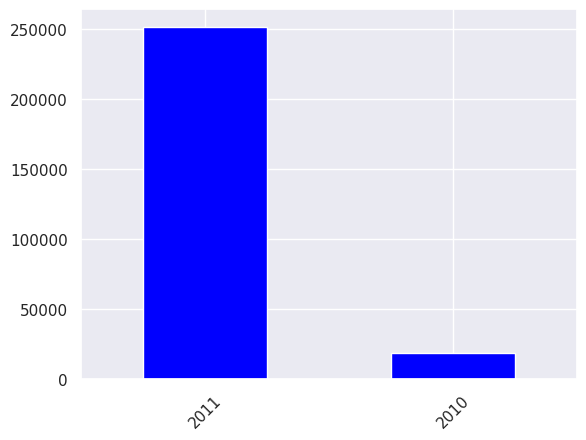

In [10]:
data.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45, color='blue');
plt.savefig("1.png")

Let us visualize the customer trend on a monthly basis in the year 2011

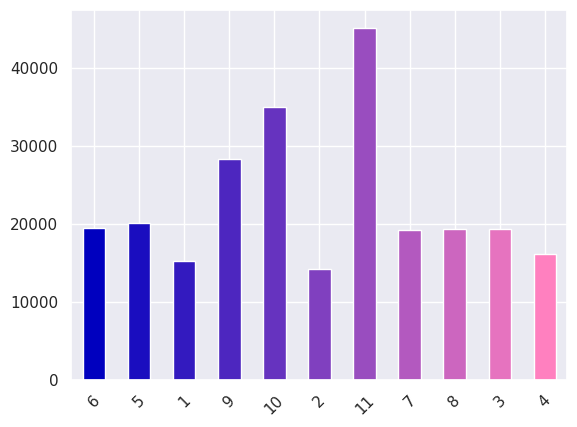

In [11]:
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(data[data.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False)))]
data[data.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar', rot=45, color=my_colors);
plt.savefig("2.png")

Visualize the Items contributing to maximum Price Value

<ipython-input-12-18a8b7ba57c7>:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df =data.TotalPrice.sort_values(ascending=False).head(10).to_frame().style.hide_index()


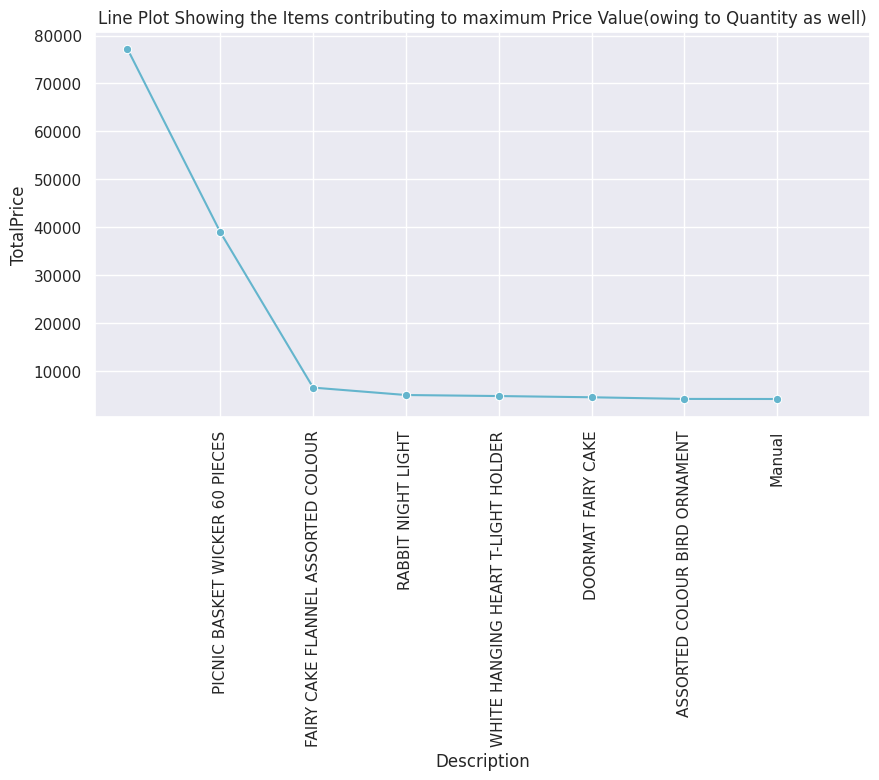

<Figure size 640x480 with 0 Axes>

In [12]:
data['TotalPrice'] = data.Quantity * data.UnitPrice
df =data.TotalPrice.sort_values(ascending=False).head(10).to_frame().style.hide_index()
desc = data.sort_values(by='TotalPrice', ascending=False)['Description'].head(10)
price = data.sort_values(by='TotalPrice', ascending=False)['TotalPrice'].head(10)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(y=price,x=desc, marker='o', color='c',).set_title('Line Plot Showing the Items contributing to maximum Price Value(owing to Quantity as well)')
plt.xticks(range(1,9), rotation=90)
plt.show();
plt.savefig("3.png")

Let us explore the data some more!

In [13]:
print ("First business transaction date is {}".format(data.InvoiceDate.min()))
print ("Last business transaction  date is {}".format(data.InvoiceDate.max()))
monthly_gross =data[data.InvoiceDate.dt.year==2011].groupby(data.InvoiceDate.dt.month).TotalPrice.sum()
df = pd.DataFrame(monthly_gross)
df.index.name = 'Invoice Month'
df


First business transaction date is 2010-12-01 08:26:00
Last business transaction  date is 2011-11-30 17:42:00


,TotalPrice
Invoice Month,
1,341878.740
2,311216.040
3,404664.240
4,293363.401
5,438680.630
6,420681.630
7,405750.701
8,435506.450
9,644332.060


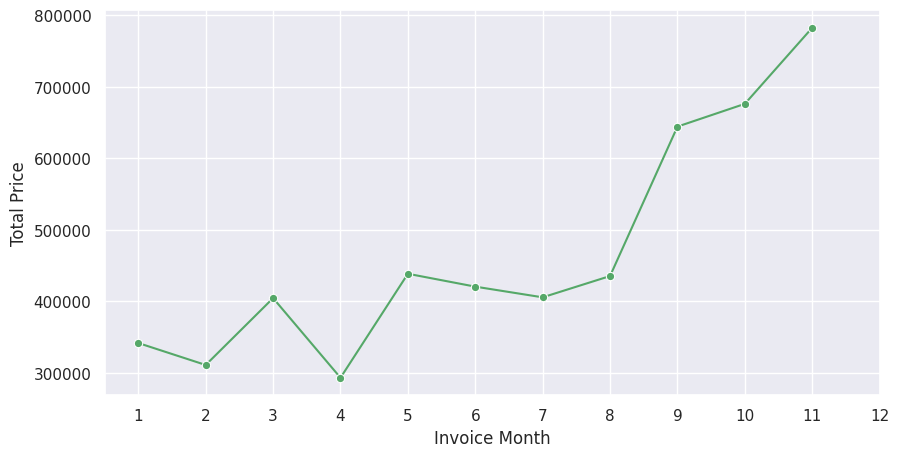

<Figure size 640x480 with 0 Axes>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o', color='g');
plt.xlabel('Invoice Month')
plt.ylabel('Total Price')
plt.xticks(range(1,13))
plt.show();
plt.savefig("4.png")

Let's visualize some top products from the whole range.

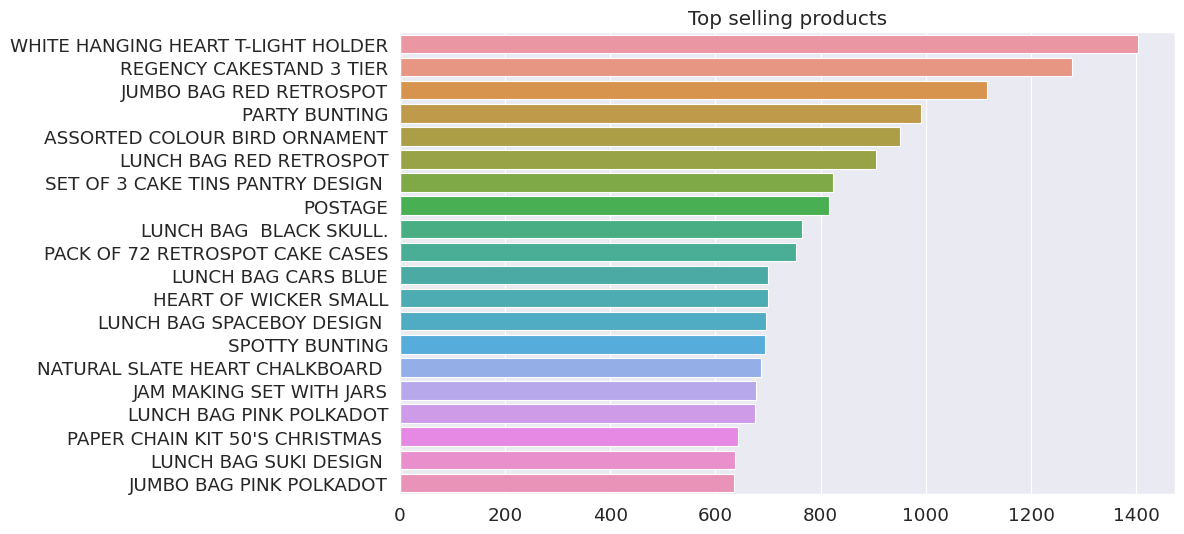

<Figure size 640x480 with 0 Axes>

In [15]:
top_products = data['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top selling products")
plt.show();
plt.savefig("5.png")

In [16]:
pd.DataFrame(data['Description'].value_counts())

,Description
WHITE HANGING HEART T-LIGHT HOLDER,1403
REGENCY CAKESTAND 3 TIER,1277
JUMBO BAG RED RETROSPOT,1116
PARTY BUNTING,991
ASSORTED COLOUR BIRD ORNAMENT,951
...,...
BLUE BUNNY EASTER EGG BASKET,1
GOLD TEDDY BEAR,1
DOORKNOB CERAMIC IVORY,1
PINK FLUFFY CHRISTMAS DECORATION,1



#### Observe Outliers using  the 1.5 Interquartile Rule
Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:

    1. Calculate the interquartile range for the data.
    2. Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
    3. Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
    4. Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

Remember that the interquartile rule is only a rule of thumb that generally holds but does not apply to every case. In general, you should always follow up your outlier analysis by studying the resulting outliers to see if they make sense. Any potential outlier obtained by the interquartile method should be examined in the context of the entire set of data.

In [17]:
def outlierDetection(datacolumn):
    #Sort the data in ascending order
    sorted(datacolumn)

    #GET Q1 and Q3
    Q1,Q3 = np.percentile(datacolumn, [25,75])

    #Calc IQR
    IQR = Q3 - Q1

    #Calc LowerRange
    lr = Q1 - (1.5 * IQR)

    #Calc Upper Range
    ur = Q3 + (1.5 * IQR)

    return lr,ur

#Outliers detection are considered only for numeric columns.ie Quantity , Unit Price and Total Price

def outlier_treatment(drop_col = False):
    for col in data.columns[[3,5,8]]:
        lowerRange,upperRange = outlierDetection(data[col])
        if not data[(data[col] > upperRange) | (data[col] < lowerRange)].empty:
            print ("Detected  outliers for this column %r " % col)
            #hdataUpdated.drop(hdataUpdated[(hdataUpdated[col] > upperRange) | (hdataUpdated[col] < lowerRange)].index , inplace=drop_col)



## 2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

### COHORT ANALYSIS


A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts.

## Types of cohorts:


### * **Time Cohorts:**

They are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.

### * **Behaviour Cohorts:**

They are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.

### * **Size Cohorts:**

Size cohorts refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.

For cohort analysis, there are a few labels that we have to create:

Invoice period - A string representation of the year and month of a single transaction/invoice.
Cohort group - A string representation of the the year and month of a customer’s first purchase. This label is common across all invoices for a particular customer.
Cohort period/Index-  A integer representation a customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase.

In [18]:
cohort =data.copy()
cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-08,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-04,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-20,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-10,19.50
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-08,15.00
...,...,...,...,...,...,...,...,...,...,...
379330,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2011-05-19,14.75
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom,2011-05-27,-3.40
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-23,0.39
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-07-07,75.00


Assign monthly acquisition cohort
Defining a cohort is the first step to cohort analysis. We will now create monthly cohorts based on the month each customer has made their first transactio

In [19]:
# Define a function that will parse the date
import datetime
def get_month(x):
    return datetime.datetime(x.year,x.month,1)

# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(get_month)

# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerID')['InvoiceMonth']

# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')

In [20]:
cohort
#grouping

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,CohortMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,30.00,2011-02-01
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,5.10,2010-12-01
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,0.85,2010-12-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,19.50,2010-12-01
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,15.00,2011-02-01
...,...,...,...,...,...,...,...,...,...,...,...
379330,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2011-05-01,14.75,2010-12-01
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom,2011-05-01,-3.40,2011-02-01
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-01,0.39,2011-10-01
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-07-01,75.00,2011-04-01


Calculate time offset in months <br>
Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

First, we will create some variables that capture the integer value of years and months for Invoice and Cohort Date using the get_date_int() function

In [21]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [22]:
print ("Unique terms for Cohort Year is {} " .format(cohort_year.unique()))
print ("Unique terms for Cohort Month is {} " .format(cohort_month.unique()))
print ("Unique terms for Invoice Year is {} " .format(invoice_year.unique()))
print ("Unique terms for Invoice Year is {} " .format(invoice_month.unique()))


Unique terms for Cohort Year is [2011 2010] 
Unique terms for Cohort Month is [ 2 12  3  4 10  1  6  7  5  9  8 11] 
Unique terms for Invoice Year is [2011 2010] 
Unique terms for Invoice Year is [ 6  5  1 12  9 10  2 11  7  8  3  4] 


In [23]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [24]:
#THis Cohort Index will give us an idea on the time difference in months between the customer's first purchase and the customer's current purchase
cohort['CohortIndex'].unique()
cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,CohortMonth,CohortIndex
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,30.00,2011-02-01,5
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,5.10,2010-12-01,6
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,0.85,2010-12-01,2
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,19.50,2010-12-01,1
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,15.00,2011-02-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...
379330,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2011-05-01,14.75,2010-12-01,6
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom,2011-05-01,-3.40,2011-02-01,4
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-01,0.39,2011-10-01,1
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-07-01,75.00,2011-04-01,4


Calculate retention rate
Customer retention is a very useful metric to understand how many of all the customers are still active. It gives you the percentage of active customers compared to the total number of customers

In [25]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

In [26]:
# Count the number of unique values per customer ID
#cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100
#print (cohort[cohort['CohortMonth']=='2011-12-01']['CustomerID'].nunique()) #Verifies 41 against this month
#cohort_sizes
retention.index = retention.index.date


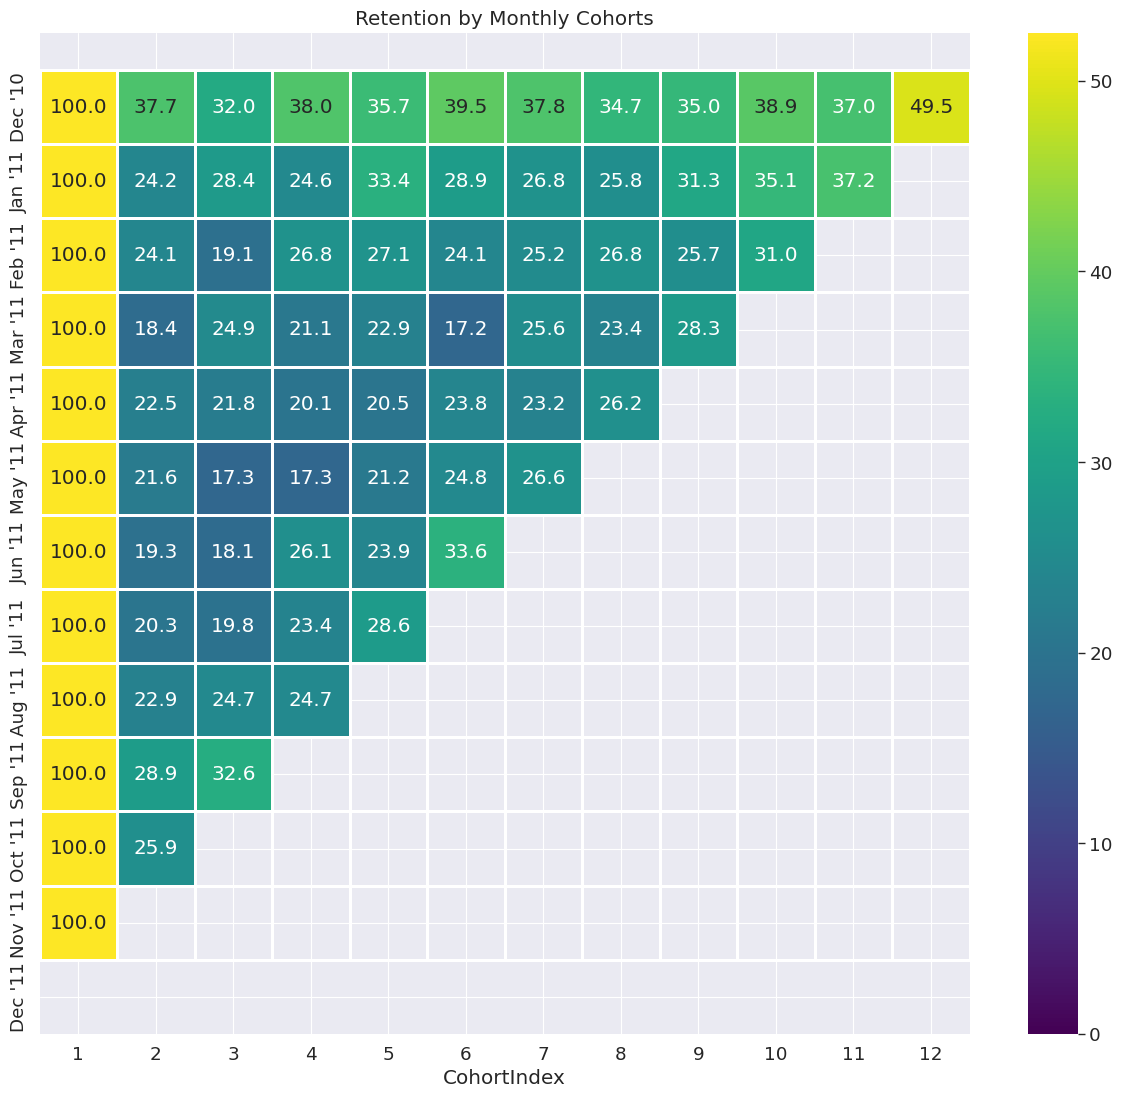

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [27]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(15,13))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
ax = sns.heatmap(data=retention,
            annot = True,
            cmap = "viridis",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.9,
            yticklabels=month_list)

# plot of the data
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig = plt.figure()
plt.show();
plt.savefig("6.png")

Calculate average price per cohort
Now we will calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts

In [28]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
#average_price.round(1)
#average_price.index = average_price.index.date
average_price
#cohort_data
#cohort

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2010-12-01,3.210827,3.167436,3.217898,3.608378,2.891733,4.821920,3.079984,3.307931,3.395984,2.930013,3.320955,2.78945
2011-01-01,3.603200,3.674171,3.153501,8.980514,3.181981,3.241779,2.927293,2.752052,2.624704,6.083418,2.942557,NaN
2011-02-01,3.346668,4.549317,4.193138,3.125063,3.012344,2.733714,2.877953,2.908338,2.899947,2.889539,NaN,NaN
2011-03-01,3.280640,4.433143,3.639079,3.333775,3.943395,2.668808,2.851939,2.768103,2.696518,NaN,NaN,NaN
2011-04-01,3.400187,4.304220,3.337422,2.737330,3.039198,2.801539,2.898230,2.804898,NaN,NaN,NaN,NaN
2011-05-01,4.952175,3.092147,2.666724,3.229299,2.661333,2.597134,2.595837,NaN,NaN,NaN,NaN,NaN
2011-06-01,13.432961,3.552146,3.383755,2.726581,2.679269,3.854374,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.500828,3.412593,2.912928,2.798478,2.352789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.012037,5.411989,5.118641,7.244066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


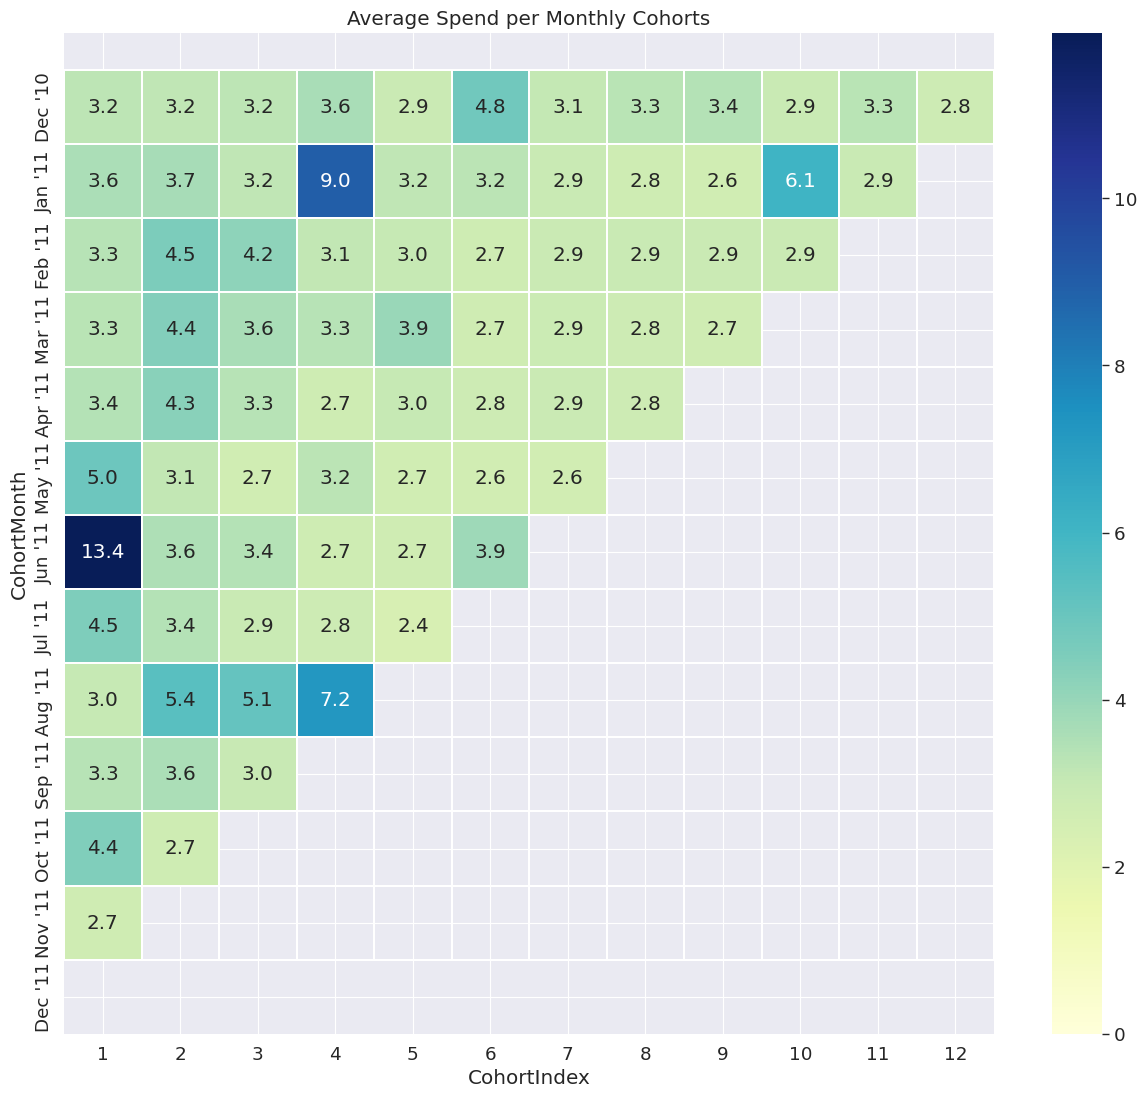

<Figure size 640x480 with 0 Axes>

In [29]:
# Initialize plot figure
plt.figure(figsize=(15, 13))

plt.title('Average Spend per Monthly Cohorts')
# Create the heatmap
ax = sns.heatmap(data = average_price,
            annot=True,
            vmin = 0.0,
#             vmax =20,
            cmap='YlGnBu',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();
plt.savefig("7.png")

Calculate average quantity per cohort <br>
Now we will calculate the average quantity metric and analyze if there are any differences in shopping patterns across time and across cohorts.

In [30]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date


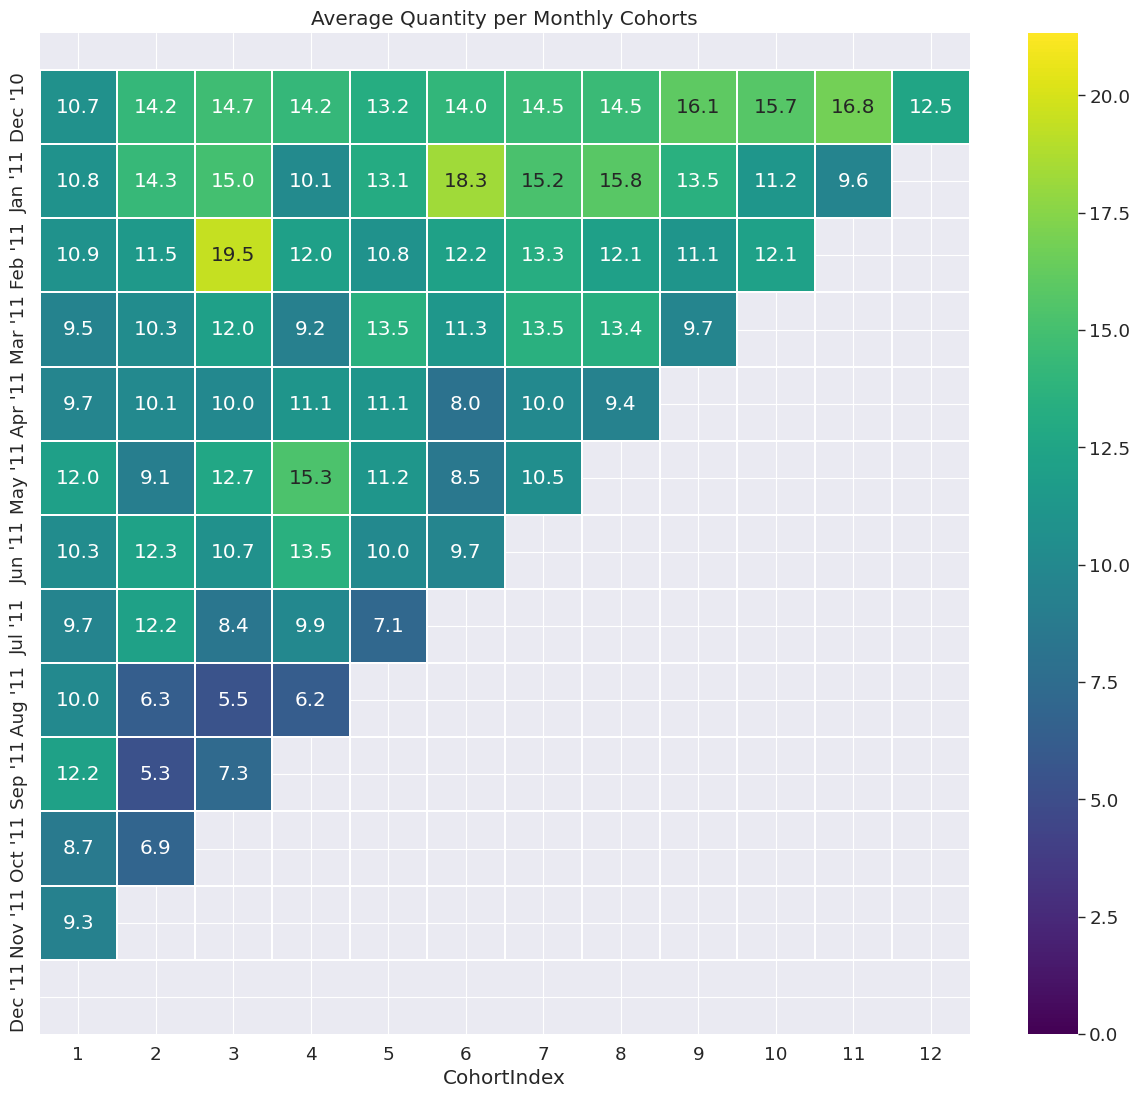

<Figure size 640x480 with 0 Axes>

In [31]:
# Initialize plot figure
plt.figure(figsize=(15, 13))

# Add a title
plt.title('Average Quantity per Monthly Cohorts')

# Create the heatmap
ax  = sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='viridis',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();
plt.savefig("8.png")

# Project Task: Week 2

## Data Modeling :

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP. <br><br>

2. Calculate RFM metrics. <br><br>

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

    b1. Combine three ratings to get a RFM segment (as strings).

    b2. Get the RFM score by adding up the three ratings.

    b3. Analyze the RFM segments by summarizing them and comment on the findings. <br><br>

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money



### RFM Analysis
RFM analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

#### **Recency (R):**
Time since last purchase

#### **Frequency (F):**  
Total number of purchases

#### **Monetary (M):**
Total purchase value

#### **Benefits of RFM analysis**
Increased customer retention
Increased response rate
Increased conversion rate
Increased revenue

To perform RFM analysis, we divide customers into four equal groups according to the distribution of values for recency, frequency, and monetary value. Four equal groups across three variables create 64 (4x4x4) different customer segments, which is a manageable number.

For example, let’s look at a customer who:
is within the group who purchased most recently (R=4),
is within the group who purchased most quantity (F=4),
is within the group who spent the most (M=4)
This customer belongs to RFM segment 4-4-4 (Best Customers), (R=4, F=4, M=4)

In [32]:
Segment =  ['Platinum Customers',
                     'Big Spenders',
                     'High Spend New Customers',
                     'Lowest-Spending Active Loyal Customers',
                     'Recent Customers',
                     'Good Customers Almost Lost',
                     'Churned Best Customers',
                     'Lost Cheap Customers ']
RFM = [
               ['444', '443'],
               ['114', '124', '134', '144', '214', '224', '234', '244', '314', '324', '334', '344', '414', '424', '434', '444'],
               ['413', '314', '313', '414'],
               ['331', '341', '431', '441'],
               ['422', '423', '424', '432', '433', '434', '442', '443', '444'],
               ['244', '234', '243', '233'],
               ['144', '134', '143', '133'],
               ['122', '111', '121', '112', '221', '212', '211']
               ]
# Create a dictionary for each segment to map them against each customer
Description = ['Customers who bought most recently, most often and spend the most',
               'Customers who spend the most',
               'New Customers who spend the most',
               'Active Customers who buy very often but spend less ',
               'Customers who have purchased recently',
               'Customers who were frequent and good spenders who are becoming very inactive',
               'Customers who were frequent and good spenders who are lost contributing to attrition',
               'Customers who purchased long ago , less frequent and very little']

Marketing = ['No price incentives, New products and Loyalty Programs',
                      'Market your most expensive products',
                      'Price Incentives',
                      'Promote economical cost effective products in daily use',
                      'Discounts and promote a variety of product sells',
                      'Aggressive Price Incentives',
                      'Monitor close communication with customers with constant feedback and rework ',
                      'Dont spend too much time to re-acquire',
                      ]
rfm_segments = pd.DataFrame({'Segment': Segment , 'RFM' : RFM , 'Description': Description, 'Marketing': Marketing})
rfm_segments

,Segment,RFM,Description,Marketing
0,Platinum Customers,"[444, 443]","Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
1,Big Spenders,"[114, 124, 134, 144, 214, 224, 234, 244, 314, ...",Customers who spend the most,Market your most expensive products
2,High Spend New Customers,"[413, 314, 313, 414]",New Customers who spend the most,Price Incentives
3,Lowest-Spending Active Loyal Customers,"[331, 341, 431, 441]",Active Customers who buy very often but spend ...,Promote economical cost effective products in ...
4,Recent Customers,"[422, 423, 424, 432, 433, 434, 442, 443, 444]",Customers who have purchased recently,Discounts and promote a variety of product sells
5,Good Customers Almost Lost,"[244, 234, 243, 233]",Customers who were frequent and good spenders ...,Aggressive Price Incentives
6,Churned Best Customers,"[144, 134, 143, 133]",Customers who were frequent and good spenders ...,Monitor close communication with customers wit...
7,Lost Cheap Customers,"[122, 111, 121, 112, 221, 212, 211]","Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire


#### **Recency** <br>
Recency is about when was the last order of a customer. It means the number of days since a customer made the last purchase. If it’s a case for a website or an app, this could be interpreted as the last visit day or the last login time.

In [33]:
#last date available in our dataset
import datetime as dt
data['InvoiceDate'].max()

Timestamp('2011-11-30 17:42:00')

In [34]:
# Lets set this date as the today's date for further analysis
current_date = dt.date(2011,11,30)
current_date

datetime.date(2011, 11, 30)

In [35]:
# Lets create a date column for date values only
data['Purchase_Date'] = data.InvoiceDate.dt.date

In [36]:
recency = data.groupby('CustomerID')['Purchase_Date'].max().reset_index()
recency

,CustomerID,Purchase_Date
0,12346.0,2011-01-18
1,12347.0,2011-10-31
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4309,18280.0,2011-03-07
4310,18281.0,2011-06-12
4311,18282.0,2011-08-09
4312,18283.0,2011-11-30


In [37]:
# Create a separate column for this date.
recency = recency.assign(Current_Date = current_date)
recency

,CustomerID,Purchase_Date,Current_Date
0,12346.0,2011-01-18,2011-11-30
1,12347.0,2011-10-31,2011-11-30
2,12348.0,2011-09-25,2011-11-30
3,12349.0,2011-11-21,2011-11-30
4,12350.0,2011-02-02,2011-11-30
...,...,...,...
4309,18280.0,2011-03-07,2011-11-30
4310,18281.0,2011-06-12,2011-11-30
4311,18282.0,2011-08-09,2011-11-30
4312,18283.0,2011-11-30,2011-11-30


In [38]:
# Compute the number of days since last purchase
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)
current_date

datetime.date(2011, 11, 30)

In [39]:
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346.0,2011-01-18,2011-11-30,316
1,12347.0,2011-10-31,2011-11-30,30
2,12348.0,2011-09-25,2011-11-30,66
3,12349.0,2011-11-21,2011-11-30,9
4,12350.0,2011-02-02,2011-11-30,301


In [40]:
# Drop the irrelevant Date columns
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)
recency

,CustomerID,Recency
0,12346.0,316
1,12347.0,30
2,12348.0,66
3,12349.0,9
4,12350.0,301
...,...,...
4309,18280.0,268
4310,18281.0,171
4311,18282.0,113
4312,18283.0,0


#### **Frequency** <br>
Frequency is about the number of purchase in a given period. It could be 3 months, 6 months or 1 year. So we can understand this value as for how often or how many a customer used the product of a company. The bigger the value is, the more engaged the customers are. Could we say them as our VIP? Not necessary. Cause we also have to think about how much they actually paid for each purchase, which means monetary value

In [41]:
frequency = data.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})
frequency.max()

CustomerID    18287.0
Frequency       229.0
dtype: float64

#### **Monetary** <br>
Monetary is the total amount of money a customer spent in that given period. Therefore big spenders will be differentiated with other customers such as MVP or VIP.

In [42]:
# Create a separate column for Total Cost of Unit purchased
data['Total_cost'] = data.Quantity * data.UnitPrice
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,Purchase_Date,Total_cost
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-08,30.00,2011-06-08,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-04,5.10,2011-05-04,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-20,0.85,2011-01-20,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-10,19.50,2010-12-10,19.50
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-08,15.00,2011-05-08,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...
379330,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2011-05-19,14.75,2011-05-19,14.75
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom,2011-05-27,-3.40,2011-05-27,-3.40
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-23,0.39,2011-10-23,0.39
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-07-07,75.00,2011-07-07,75.00


In [43]:
monetary = data.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost':'Monetary'})
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,3036.78
2,12348.0,1009.88
3,12349.0,1344.17
4,12350.0,213.30


Now Combine all three to form an aggregated RFM Table    

In [44]:
rf = recency.merge(frequency, on='CustomerID')
rfm_table = rf.merge(monetary, on='CustomerID')

In [45]:
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()
#rfm_table.Monetary.max()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,2,0.00
12347.0,30,6,3036.78
12348.0,66,4,1009.88
12349.0,9,1,1344.17
12350.0,301,1,213.30


#### RFM Table integrity Check
Let's check whether the RFM table attributes are in conjunction with the original values

In [46]:
rfm_table.index[1]

12347.0

In [47]:
# Fetch the records corresponding to the first customer id in above table
data[data.CustomerID == rfm_table.index[1]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,Purchase_Date,Total_cost
3434,573511,23177,TREASURE ISLAND BOOK BOX,8,2011-10-31 12:25:00,2.25,12347.0,Iceland,2011-10-31,18.00,2011-10-31,18.00
5712,573511,22727,ALARM CLOCK BAKELIKE RED,12,2011-10-31 12:25:00,3.75,12347.0,Iceland,2011-10-31,45.00,2011-10-31,45.00
7992,573511,22196,SMALL HEART MEASURING SPOONS,24,2011-10-31 12:25:00,0.85,12347.0,Iceland,2011-10-31,20.40,2011-10-31,20.40
16714,549222,22497,SET OF 2 TINS VINTAGE BATHROOM,4,2011-04-07 10:43:00,4.25,12347.0,Iceland,2011-04-07,17.00,2011-04-07,17.00
21190,573511,84992,72 SWEETHEART FAIRY CAKE CASES,24,2011-10-31 12:25:00,0.55,12347.0,Iceland,2011-10-31,13.20,2011-10-31,13.20
...,...,...,...,...,...,...,...,...,...,...,...,...
361055,549222,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-04-07 10:43:00,2.95,12347.0,Iceland,2011-04-07,17.70,2011-04-07,17.70
366311,542237,22423,REGENCY CAKESTAND 3 TIER,3,2011-01-26 14:30:00,12.75,12347.0,Iceland,2011-01-26,38.25,2011-01-26,38.25
371858,573511,22371,AIRLINE BAG VINTAGE TOKYO 78,12,2011-10-31 12:25:00,3.95,12347.0,Iceland,2011-10-31,47.40,2011-10-31,47.40
375854,573511,22697,GREEN REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347.0,Iceland,2011-10-31,35.40,2011-10-31,35.40


In [48]:
# Check if the number difference of days from the purchase date in original record is same as shown in rfm table.
(current_date - data[data.CustomerID == rfm_table.index[0]].iloc[0].Purchase_Date).days == rfm_table.iloc[0,0]

True

#### Customer segments with RFM Model <br>

The simplest way to create customers segments from RFM Model is to use Quantiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [49]:
# RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,15.0,1.0,195.90
0.50,48.0,2.0,446.42
0.75,145.0,5.0,1103.54


In [50]:
# Let's convert quartile information into a dictionary so that cutoffs can be picked up.
quantiles=quantiles.to_dict()
quantiles
rfm_table

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,2,0.00
12347.0,30,6,3036.78
12348.0,66,4,1009.88
12349.0,9,1,1344.17
12350.0,301,1,213.30
...,...,...,...
18280.0,268,1,91.70
18281.0,171,1,59.28
18282.0,113,2,45.36


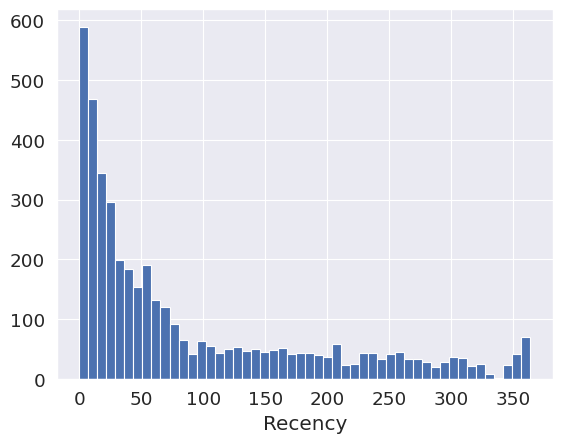

<Figure size 640x480 with 0 Axes>

In [51]:
#Let us visualize the histogram charts for Recency, Frequency and Monetary
plt.hist(rfm_table.Recency, bins = 50, color='b')
plt.xlabel('Recency')
plt.show()
plt.savefig("9.png")

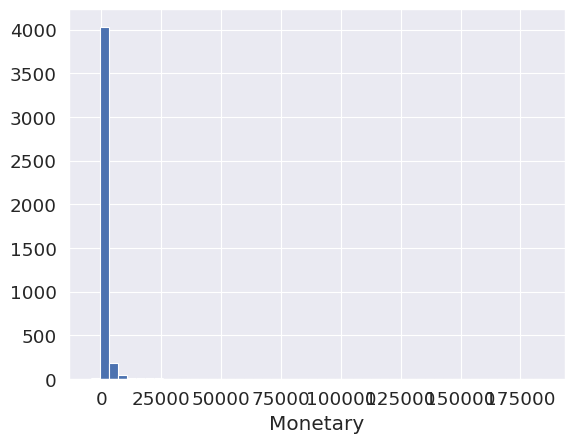

<Figure size 640x480 with 0 Axes>

In [52]:
plt.hist(rfm_table.Monetary, bins = 50, color='b')
plt.xlabel('Monetary')
plt.show()
plt.savefig("10.png")

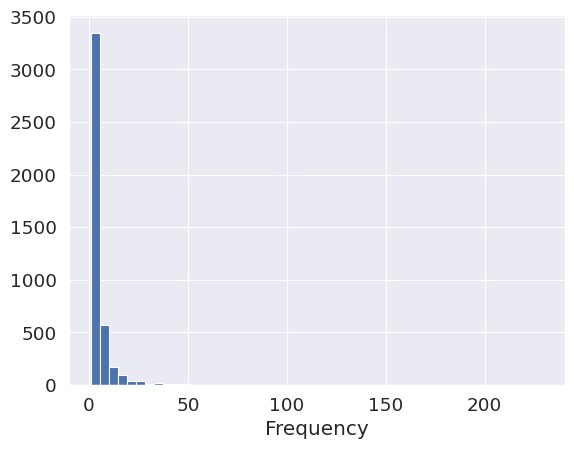

<Figure size 640x480 with 0 Axes>

In [53]:
plt.hist(rfm_table.Frequency, bins = 50, color='b')
plt.xlabel('Frequency')
plt.show()
plt.savefig("11.png")

Creation of RFM Segments <br>
We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good

In [54]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quantiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
rfm_segment = rfm_table.copy()
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [55]:
rfm_segment.head()
rfm_segment[rfm_segment.Monetary == rfm_segment.Monetary.max()]
rfm_segment

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,316,2,0.00,1,2,1
12347.0,30,6,3036.78,3,4,4
12348.0,66,4,1009.88,2,3,3
12349.0,9,1,1344.17,4,1,4
12350.0,301,1,213.30,1,1,2
...,...,...,...,...,...,...
18280.0,268,1,91.70,1,1,1
18281.0,171,1,59.28,1,1,1
18282.0,113,2,45.36,2,2,1


For analysis it is critical to combine the scores to create a single score. There are few approaches. One approach is to just concatenate the scores to create a 3 digit number between 111 and 444. Here the drawback is too many categories (4x4x4).

In [56]:
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,316,2,0.00,1,2,1,121
12347.0,30,6,3036.78,3,4,4,344
12348.0,66,4,1009.88,2,3,3,233
12349.0,9,1,1344.17,4,1,4,414
12350.0,301,1,213.30,1,1,2,112


    1.Best Recency score = 4 (most recently purchase)
    2.Best Frequency score = 4 (most frequently purchase)
    3.Best Monetary score = 4 (who spent the most)

#### **RFM Segment allocation** <br>
Lets define the customers segment best to our knowledge basis RFM score and assign them to each customer respectively

In [57]:
# Reset the index to create a customer_ID column
rfm_segment.reset_index(inplace=True)

In [58]:
import itertools

# Highest frequency as well as monetary value with least recencycy
platinum_customers = ['444', '443']
print ("Platinum Customers                     : {}".format(platinum_customers))

# Get all combinations of [1, 2, 3,4] and length 2
big_spenders_comb =  itertools.product([1, 2, 3,4],repeat = 2)
# Print the obtained combinations
big_spenders = []
for i in list(big_spenders_comb):
    item = (list(i))
    item.append(4)
    big_spenders.append( ("".join(map(str,item))))
print ("Big Spenders                           : {}".format(big_spenders))

#High-spending New Customers – This group consists of those customers in 1-4-1 and 1-4-2.
#These are customers who transacted only once, but very recently and they spent a lot

high_spend_new_customers = ['413', '314' ,'313','414']
print ("High Spend New Customers               : {}".format(high_spend_new_customers))


lowest_spending_active_loyal_customers_comb =  itertools.product([ 3,4], repeat = 2)
lowest_spending_active_loyal_customers = []
for i in list(lowest_spending_active_loyal_customers_comb):
    item = (list(i))
    item.append(1)
    lowest_spending_active_loyal_customers.append( ("".join(map(str,item))))
print ("Lowest Spending Active Loyal Customers : {}".format(lowest_spending_active_loyal_customers))

recent_customers_comb =  itertools.product([ 2,3,4], repeat = 2)
recent_customers = []
for i in list(recent_customers_comb):
    item = (list(i))
    item.insert(0,4)
    recent_customers.append( ("".join(map(str,item))))
print ("Recent Customers                       : {}".format(recent_customers))




almost_lost = ['244', '234', '243', '233']        #  Low R - Customer's shopping less often now who used to shop a lot
print ("Good Customers Almost Lost             : {}".format(almost_lost))

churned_best_customers = ['144', '134' ,'143','133']
print ("Churned Best Customers                 : {}".format(churned_best_customers))


lost_cheap_customers = ['122','111' ,'121','112','221','212' ,'211'] # Customer's shopped long ago but with less frequency and monetary value
print ("Lost Cheap Customers                   : {}".format(lost_cheap_customers))


Platinum Customers                     : ['444', '443']
Big Spenders                           : ['114', '124', '134', '144', '214', '224', '234', '244', '314', '324', '334', '344', '414', '424', '434', '444']
High Spend New Customers               : ['413', '314', '313', '414']
Lowest Spending Active Loyal Customers : ['331', '341', '431', '441']
Recent Customers                       : ['422', '423', '424', '432', '433', '434', '442', '443', '444']
Good Customers Almost Lost             : ['244', '234', '243', '233']
Churned Best Customers                 : ['144', '134', '143', '133']
Lost Cheap Customers                   : ['122', '111', '121', '112', '221', '212', '211']


In [59]:
# Create a dictionary for each segment to map them against each customer
segment_dict = {
    'Platinum Customers':platinum_customers,
    'Big Spenders':      big_spenders,
    'High Spend New Customers':high_spend_new_customers,
    'Lowest-Spending Active Loyal Customers' : lowest_spending_active_loyal_customers ,
    'Recent Customers': recent_customers,
    'Good Customers Almost Lost':almost_lost,
    'Churned Best Customers':   churned_best_customers,
    'Lost Cheap Customers ': lost_cheap_customers,
}

In [60]:
# Allocate segments to each customer as per the RFM score mapping
def find_key(value):
    for k, v in segment_dict.items():
        if value in v:
            return k
rfm_segment['Segment'] = rfm_segment.RFMScore.map(find_key)

# Allocate all remaining customers to others segment category
rfm_segment.Segment.fillna('others', inplace=True)
rfm_segment.sample(10)


,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
4257,18213.0,227,1,169.20,1,1,1,111,Lost Cheap Customers
2846,16245.0,14,4,912.57,4,3,3,433,Recent Customers
1031,13751.0,279,1,248.55,1,1,2,112,Lost Cheap Customers
720,13311.0,141,1,329.96,2,1,2,212,Lost Cheap Customers
1004,13717.0,23,6,900.64,3,4,3,343,others
3493,17146.0,96,3,556.10,2,3,3,233,Good Customers Almost Lost
1494,14401.0,20,13,2267.92,3,4,4,344,Big Spenders
117,12497.0,72,1,749.10,2,1,3,213,others
3263,16820.0,86,1,287.47,2,1,2,212,Lost Cheap Customers
3539,17217.0,225,1,94.00,1,1,1,111,Lost Cheap Customers


Let's visualize different customer segments records in general to answers these questions for the retail business.
Who are my best customers? <br>
Who are the biggest spenders? <br>
Which customers are at the verge of churning? <br>
Who are lost customers that you don’t need to pay much attention to? <br>
Who are your loyal customers? <br>
Which customers you must retain? <br>
Who has the potential to be converted in more profitable customers? <br>
Which group of customers is most likely to respond to your current campaign? <br>

In [61]:
# Best Customers who's recency, frequency as well as monetary attribute is highest.
rfm_segment[rfm_segment.RFMScore=='444'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1677,14646.0,7,70,184021.54,4,4,4,444,Platinum Customers
3709,17450.0,1,48,113747.86,4,4,4,444,Platinum Customers
1868,14911.0,0,229,91207.32,4,4,4,444,Platinum Customers
54,12415.0,15,19,80874.54,4,4,4,444,Platinum Customers
1325,14156.0,0,63,76938.26,4,4,4,444,Platinum Customers


In [62]:
# Biggest spenders
rfm_segment[rfm_segment.RFMScore=='334'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
12,12359.0,48,5,4738.52,3,3,4,334,Big Spenders
2753,16126.0,20,4,4279.60,3,3,4,334,Big Spenders
723,13316.0,28,5,3828.67,3,3,4,334,Big Spenders
2856,16258.0,36,5,3761.40,3,3,4,334,Big Spenders
2882,16303.0,16,4,3625.31,3,3,4,334,Big Spenders


In [63]:
# customers that you must retain are those whose monetary and frequency was high but recency reduced quite a lot recently
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
455,12939.0,55,8,8402.52,2,4,4,244,Big Spenders
2795,16180.0,91,10,7878.22,2,4,4,244,Big Spenders
49,12409.0,69,6,7550.55,2,4,4,244,Big Spenders
1768,14769.0,68,9,7227.81,2,4,4,244,Big Spenders
3202,16745.0,77,18,5261.59,2,4,4,244,Big Spenders


In [64]:
rfm_segment.to_excel('RFM Segment.xlsx')

In [65]:
rfm_segment.Segment.value_counts()
rfm_segment.Recency

0       316
1        30
2        66
3         9
4       301
       ... 
4309    268
4310    171
4311    113
4312      0
4313     33
Name: Recency, Length: 4314, dtype: int64

## Project Task: Week 3
### Data Modeling :

#### 1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

#### a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data

<ipython-input-66-6eee1505bea0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
<ipython-input-66-6eee1505bea0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_table.Frequency , color="grey", ax=axes[1], axlabel='Freque

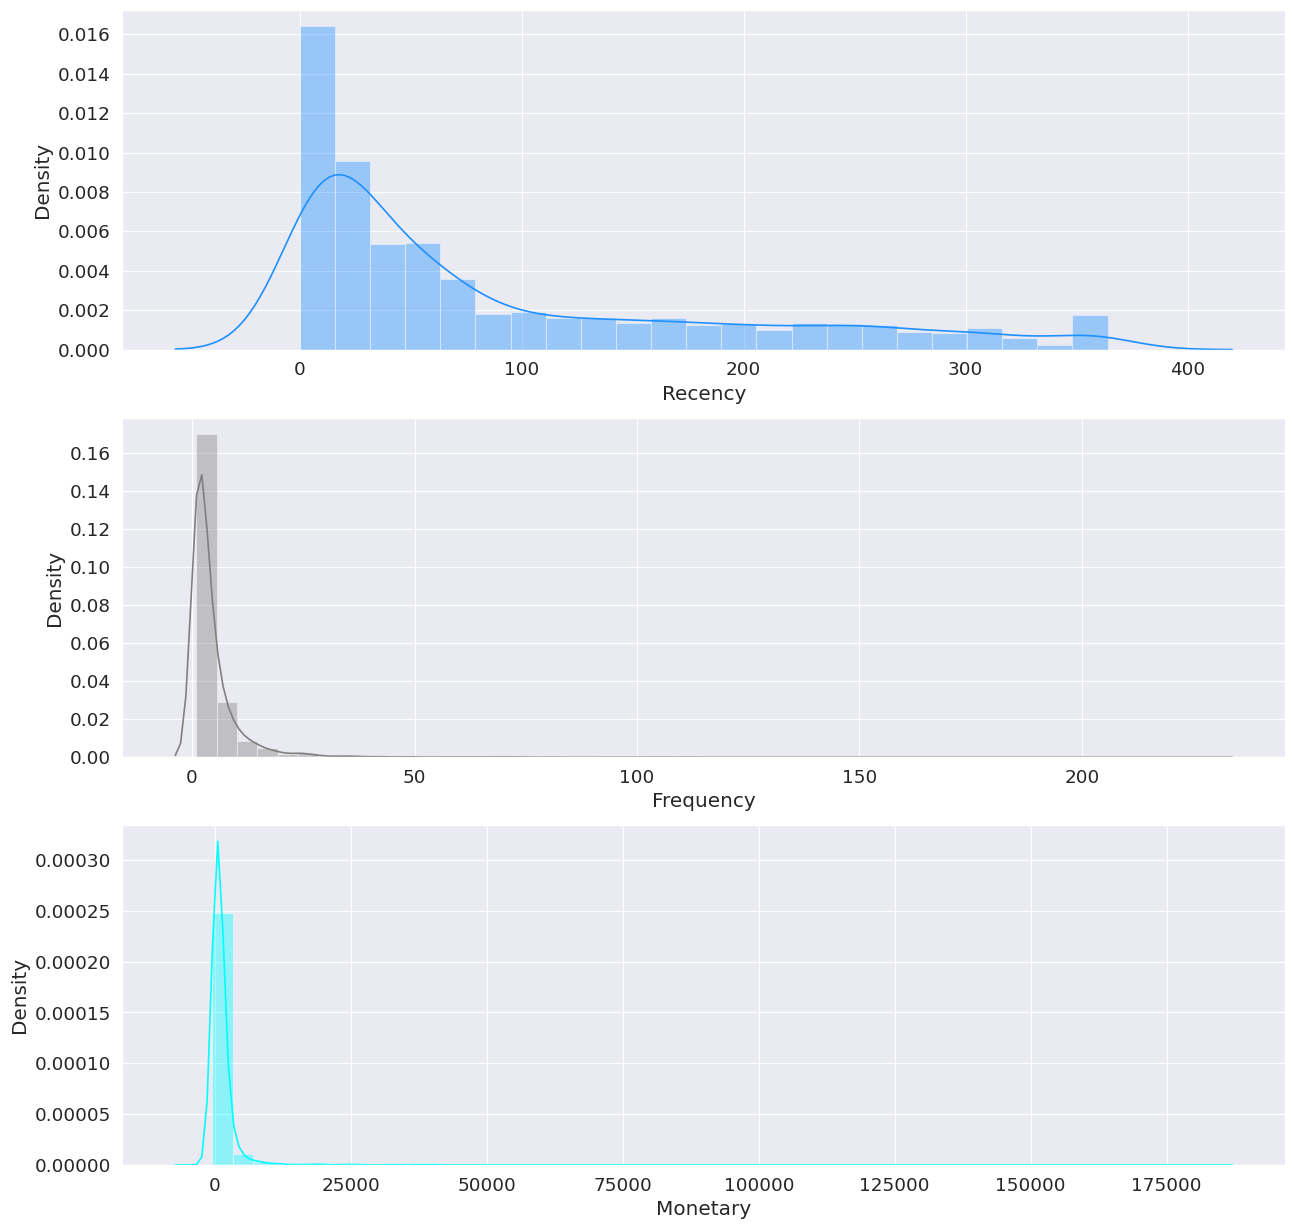

In [66]:
# Distribution plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="grey", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="cyan", ax=axes[2], axlabel='Monetary')
plt.show();

Here we can observe that the data is highly skewed. So we have to transform and scale the data first because K-Means assumes that the variables should have a symmetric distributions(not skewed) and they should have same average values as well as same variance.

In [67]:
# Let's describe the table to see if there are any negative values
rfm_table.describe()

,Recency,Frequency,Monetary
count,4314.000000,4314.000000,4314.000000
mean,90.776541,4.663421,1283.226057
std,99.722909,8.467492,5376.569489
min,0.000000,1.000000,-4287.630000
25%,15.000000,1.000000,195.900000
50%,48.000000,2.000000,446.420000
75%,145.000000,5.000000,1103.540000
max,364.000000,229.000000,184021.540000


We can observe that Monetary contains negative values. So first we need to make sure that minimum range of value starts from 1 otherwise log transformation may lead to errors in graph plotting as well as K-Means clustering. After that we will utilize log transformation and scaling to make data available for for K-Means clustering

In [68]:
# Create a copy of rfm table
rfm_table_scaled = rfm_table.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_table_scaled.Monetary = rfm_table_scaled.Monetary + abs(rfm_table_scaled.Monetary.min()) + 1
rfm_table_scaled.Recency = rfm_table_scaled.Recency + abs(rfm_table_scaled.Recency.min()) + 1

# Check the summary of new values
rfm_table_scaled.describe()

,Recency,Frequency,Monetary
count,4314.000000,4314.000000,4314.000000
mean,91.776541,4.663421,5571.856057
std,99.722909,8.467492,5376.569489
min,1.000000,1.000000,1.000000
25%,16.000000,1.000000,4484.530000
50%,49.000000,2.000000,4735.050000
75%,146.000000,5.000000,5392.170000
max,365.000000,229.000000,188310.170000


In [69]:
# Transform the data before K-Means clustering
from sklearn.preprocessing import StandardScaler

# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_table_scaled)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_table.index, columns=rfm_table.columns)

In [70]:
normal_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.386415,-0.335465,-0.607171
12347.0,-0.206101,0.843296,1.129786
12348.0,0.321816,0.408250,0.078871
12349.0,-0.981087,-1.079181,0.277362
12350.0,1.353211,-1.079181,-0.449694
...,...,...,...
18280.0,1.273948,-1.079181,-0.538531
18281.0,0.967615,-1.079181,-0.562633
18282.0,0.685886,-0.335465,-0.573036


Visualize the data after applying logarathmic transformation on scaled data.
Observe that the skewness is reduced

<ipython-input-71-33a820021896>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
<ipython-input-71-33a820021896>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1], axlabel='Fr

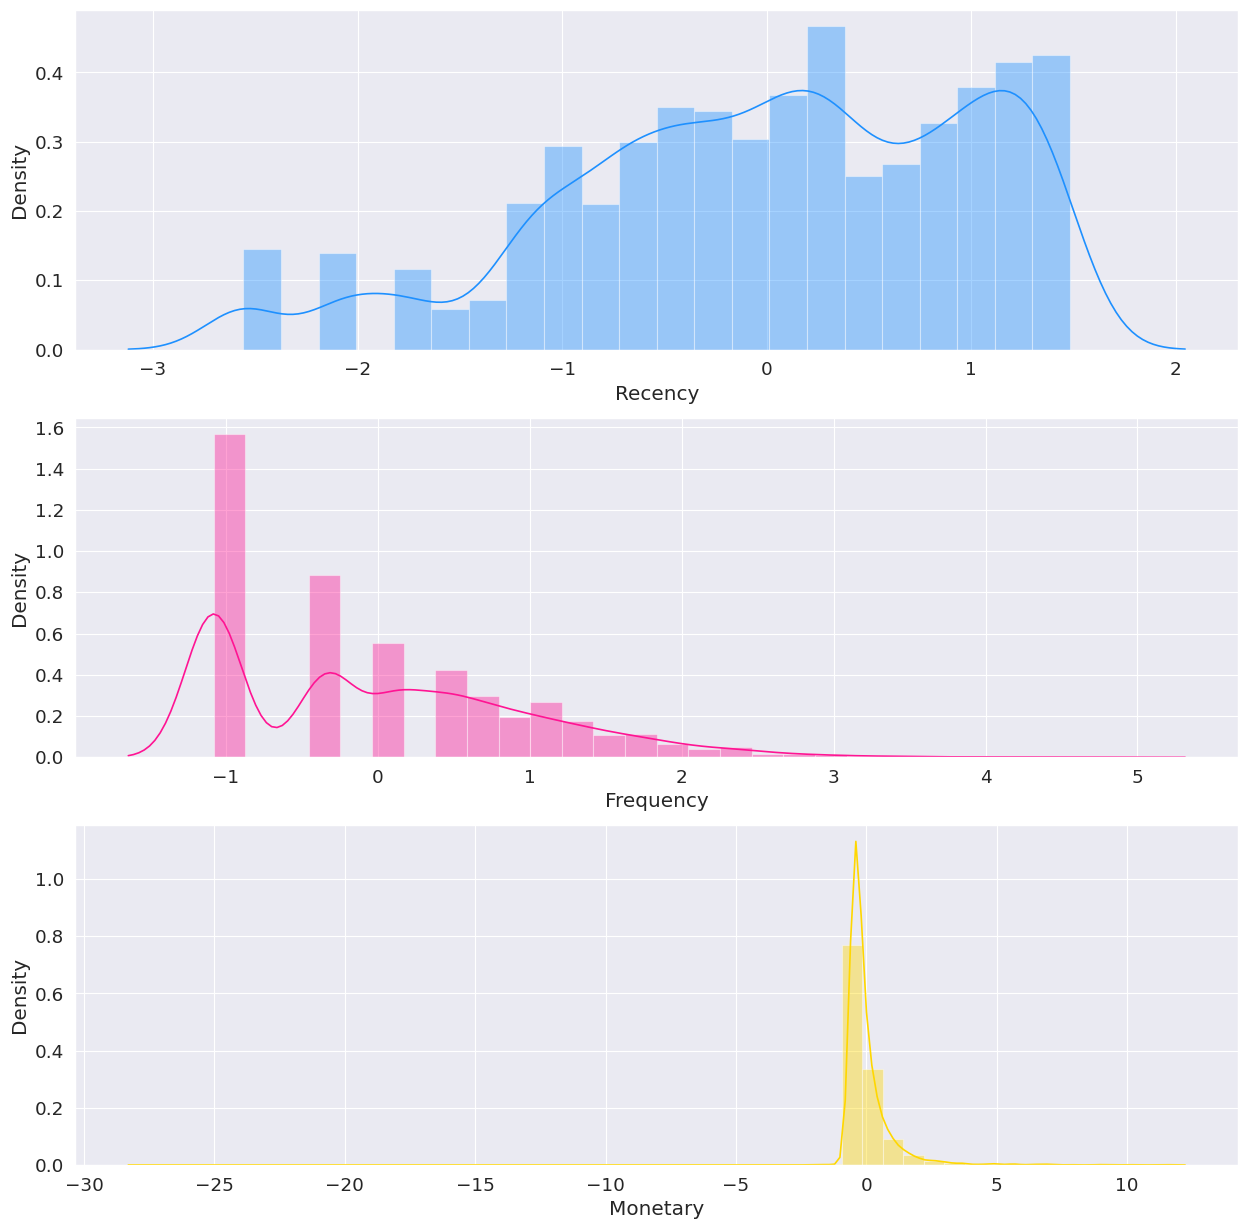

<Figure size 640x480 with 0 Axes>

In [71]:
# Distribution plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show();
plt.savefig("12.png")

We can observe that the means & averages are approximately uniformed now in each distribution. Now the data is apt for unsupervised algo i.e. K-Means. Lets try to find number of appropriate clusters to divide customers as per there spending pattern with elbow method first

#### b. Decide the optimum number of clusters to be formed.

##### b. 1 WCSS - Within Cluster Sum of Squares (WCSS)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

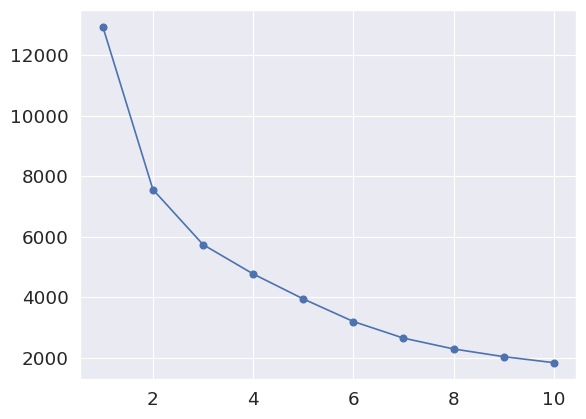

In [72]:
# find WCSS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');


Let us copy this data to an Excel sheet.
This will be used in Tableau to determine the elbow Plot.

In [73]:
ElbowPlot = pd.DataFrame({'Cluster': range(1,11) , 'SSE': wcss})
ElbowPlot.to_excel('Elbow Plot Data.xlsx')

##### b.2 Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 3: 0.4024582822039984


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 4: 0.34918507946393096


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 5: 0.3651947947600423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 6: 0.36305278986217276


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 7: 0.3652473053575613


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 8: 0.35810318115204004


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 9: 0.36024054175884523


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 10: 0.35602880310160956


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for number of cluster(s) 11: 0.3660607600652981


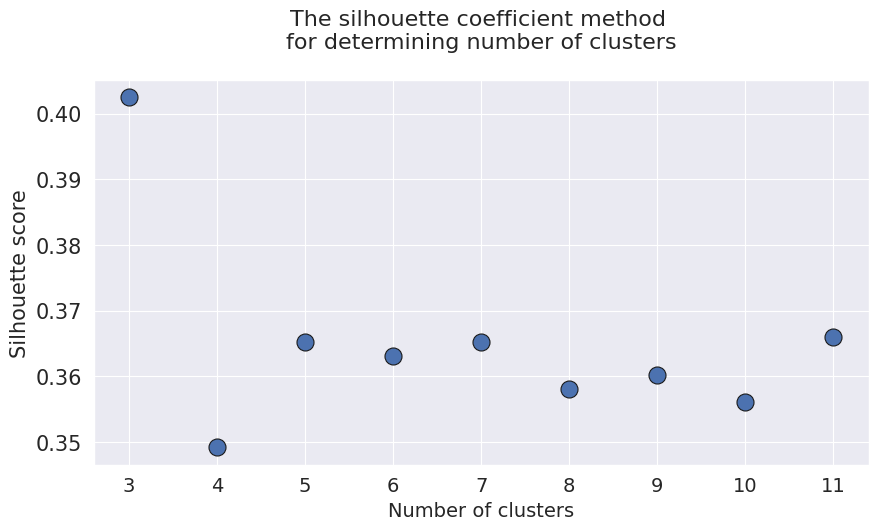

In [74]:
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(3,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)
    silhouette = silhouette_score(normal_df,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(3,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(3,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Here we can clearly see that optimum number of cluster should be 4 not 2 or 3. Because that is the only point after which the mean cluster distance looks to be plateaued after a steep downfall. So we will assume the 4 number of clusters as best for grouping of customer segments.

Now let's apply K-Means on 4 clusters to segregate the customer base

In [75]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [76]:
kmeans

KMeans(n_clusters=4, random_state=1)

In [77]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {rfm_segment.shape}")

Shape of cluster label array is (4314,)
Shape of RFM segment dataframe is (4314, 9)


In [78]:
# Assign the clusters as column to each customer
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)

In [79]:
# Check counts of records assigned to different clusters
Cluster_table.Cluster.value_counts()

0    2038
2    1140
1    1037
3      99
Name: Cluster, dtype: int64

Here we see that most of the customers belong to 0 ,2 and 3 cluster, whereas very less number of customers assigned to 1 cluster, may be possible that those are some of the best customers out of the pool or worst customer, lets checkout the pattern

In [80]:
Cluster_table.sample(10)
print ("Platinum customers belong to cluster                      : {} ".format(Cluster_table[Cluster_table['Segment']=='Platinum Customers']['Cluster'].unique()))
print ("Big Spenders belong to cluster                            : {} ".format(Cluster_table[Cluster_table['Segment']=='Big Spenders']['Cluster'].unique()))
print ("High Spend new Customers belong to cluster                : {} ".format(Cluster_table[Cluster_table['Segment']=='High Spend New Customers']['Cluster'].unique()))
print ("Lowest-Spending Active Loyal Customers belong to cluster  : {} ".format(Cluster_table[Cluster_table['Segment']=='Lowest-Spending Active Loyal Customers']['Cluster'].unique()))
print ("Recent Customers belong to cluster                        : {} ".format(Cluster_table[Cluster_table['Segment']=='Recent Customers']['Cluster'].unique()))
print ("Good Customers Almost Lost belong to cluster              : {} ".format(Cluster_table[Cluster_table['Segment']=='Good Customers Almost Lost']['Cluster'].unique()))
print ("Churned Best Customers belong to cluster                  : {} ".format(Cluster_table[Cluster_table['Segment']=='Churned Best Customers']['Cluster'].unique()))
print ("Lost Cheap customers belong to cluster                    : {} ".format(Cluster_table[Cluster_table['Segment']=='Lost Cheap Customers ']['Cluster'].unique()))


Platinum customers belong to cluster                      : [1 3] 
Big Spenders belong to cluster                            : [1 2 0 3] 
High Spend new Customers belong to cluster                : [2 0] 
Lowest-Spending Active Loyal Customers belong to cluster  : [2] 
Recent Customers belong to cluster                        : [2 1] 
Good Customers Almost Lost belong to cluster              : [0 2 1] 
Churned Best Customers belong to cluster                  : [0 1] 
Lost Cheap customers belong to cluster                    : [0] 


Here we can observe that RFM score is very low for customers in 0 & 3 cluster. Comparetivey, customers in 1&2 clusters have high RFM scores along with above average Recency and frequency values.

Let's checkout customers in each cluster more closely

In [81]:
Cluster_table[Cluster_table.Cluster == 3].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2552,15838.0,2,18,24673.00,4,4,4,444,Platinum Customers,3
1856,14895.0,20,18,6969.00,3,4,4,344,Big Spenders,3
269,12681.0,5,26,9824.98,4,4,4,444,Platinum Customers,3
1972,15061.0,1,51,38026.20,4,4,4,444,Platinum Customers,3
3656,17381.0,15,24,11958.47,4,4,4,444,Platinum Customers,3


Here it can be seen that the RFM score for Cluster 3 customers with low recency, good frequency and high monetary value, These are the loyal customers to the firm.




In [82]:
Cluster_table[Cluster_table.Cluster == 2].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
2549,15835.0,35,4,741.81,3,3,3,333,others,2
2264,15452.0,20,3,389.71,3,3,2,332,others,2
812,13449.0,14,1,248.35,4,1,2,412,others,2
1921,14997.0,37,4,362.90,3,3,2,332,others,2
390,12844.0,20,2,199.90,3,2,2,322,others,2



Cluster 2 contains the highest number of customers who accounts for lowest value to the firm because there RFM values are lowest. Most of them are in the lost segment or on the verge of churning out

In [83]:
Cluster_table[Cluster_table.Cluster == 1].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
3090,16592.0,3,17,2317.97,4,4,4,444,Platinum Customers,1
1707,14688.0,30,24,3143.76,3,4,4,344,Big Spenders,1
3504,17162.0,19,9,1335.69,3,4,4,344,Big Spenders,1
4303,18272.0,36,6,1729.82,3,4,4,344,Big Spenders,1
2395,15632.0,6,10,2213.26,4,4,4,444,Platinum Customers,1


Cluster 1 with very high monetary value along with good frequency and recency values. These are the most valuable customers to the firm. They should be looked after periodically to access there concerns


In [84]:
Cluster_table[Cluster_table.Cluster == 0].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
202,12601.0,180,5,478.42,1,3,3,133,Churned Best Customers,0
325,12752.0,72,1,3329.58,2,1,4,214,Big Spenders,0
2533,15813.0,198,2,806.26,1,2,3,123,others,0
2744,16116.0,196,2,473.47,1,2,3,123,others,0
710,13299.0,259,1,35.40,1,1,1,111,Lost Cheap Customers,0



Cluster 0 is somewhat average collectively can respond to the targeted campaigns.

#### Scatter Plot to visualize the division of customers into different segments based on the RFM atributes.

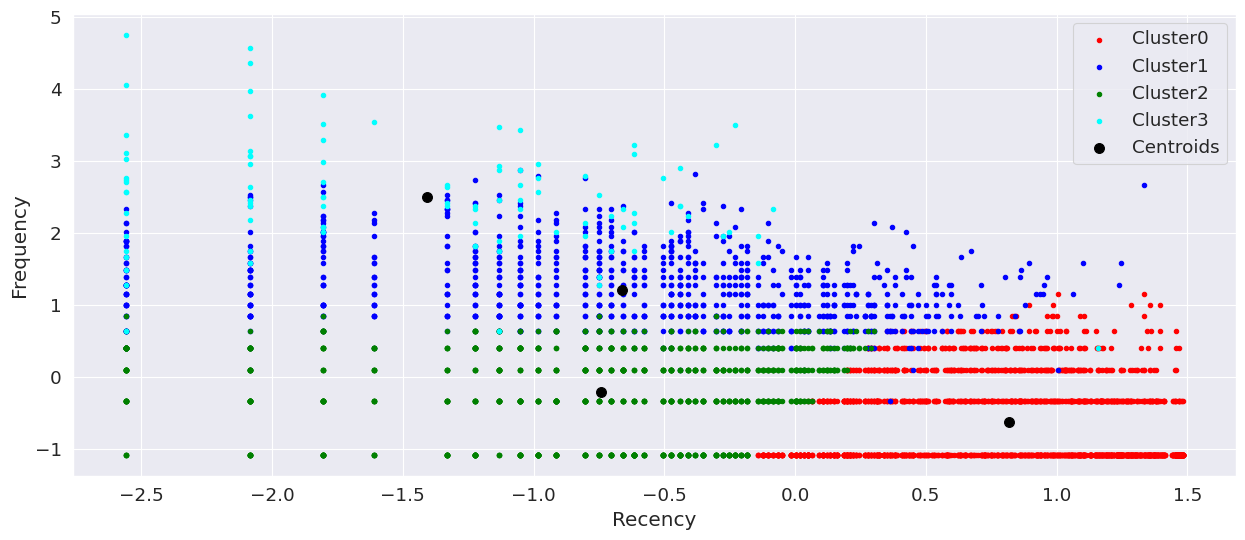

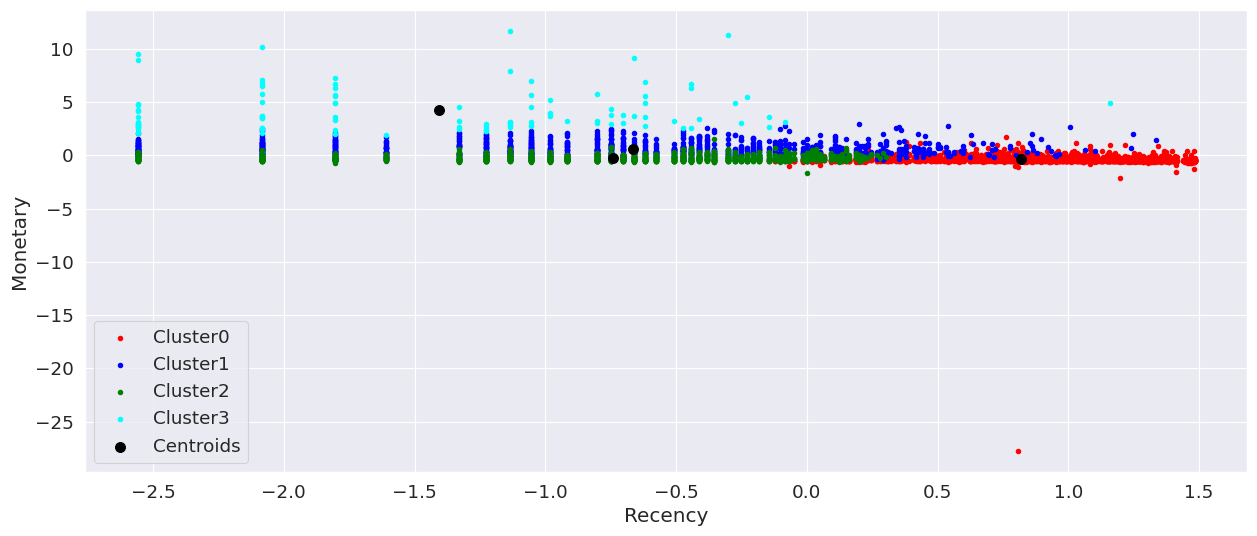

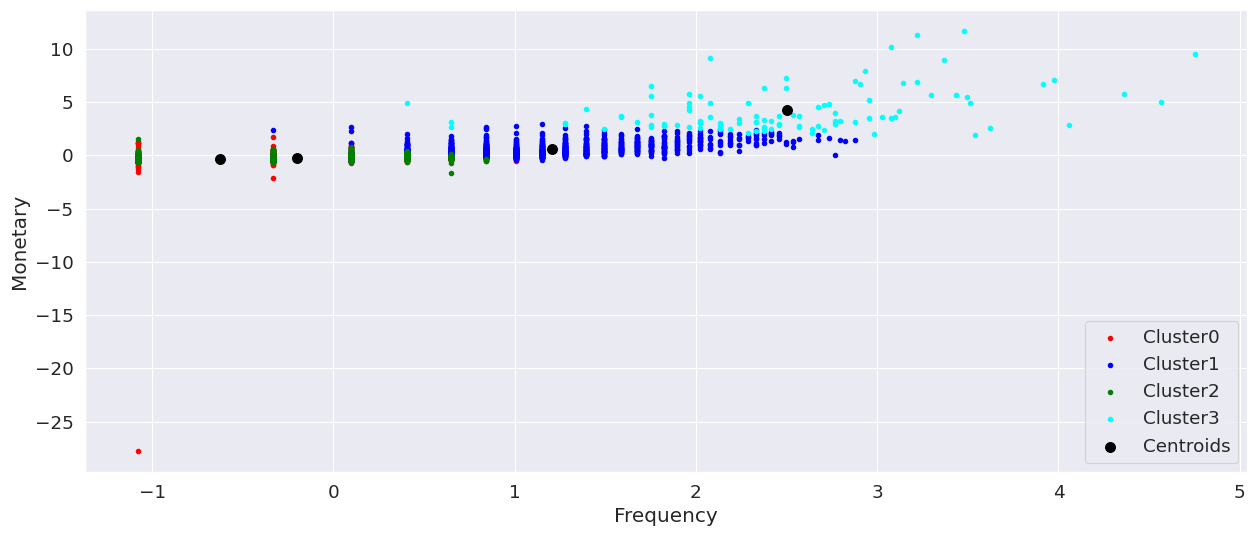

In [85]:
# Plotting two dimesional plots of each attributes respectively.
X = normal_df.iloc[:,0:3].values
count=X.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster2')
        plt.scatter(X[cluster_labels == 3, i], X[cluster_labels == 3, j], s = 10, c = 'cyan', label = 'Cluster3')
        plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s = 50, c = 'black', label = 'Centroids')
        plt.xlabel(normal_df.columns[i])
        plt.ylabel(normal_df.columns[j])
        plt.legend()
        plt.show();

In [86]:
Cluster_table.to_excel('RFMSegment.xlsx')

Let's try to visualize this pattern through the help Clusters


#### Heat Map
We will utilize heat map to visualize the relative importance of each attributes in all four customer segments i.e. clusters. It calculates importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average).

The farther a ratio is from 0, the more important that attribute is for a segment relative to the total population.



In [87]:
# Assign Cluster labels to RFM table
rfm_table_cluster = rfm_table.assign(Cluster = cluster_labels)

# Average attributes for each cluster
cluster_avg = rfm_table_cluster.groupby(['Cluster']).mean()

# Calculate the population average
population_avg = rfm_table.mean()

# Calculate relative importance of attributes by
relative_imp = cluster_avg / population_avg - 1


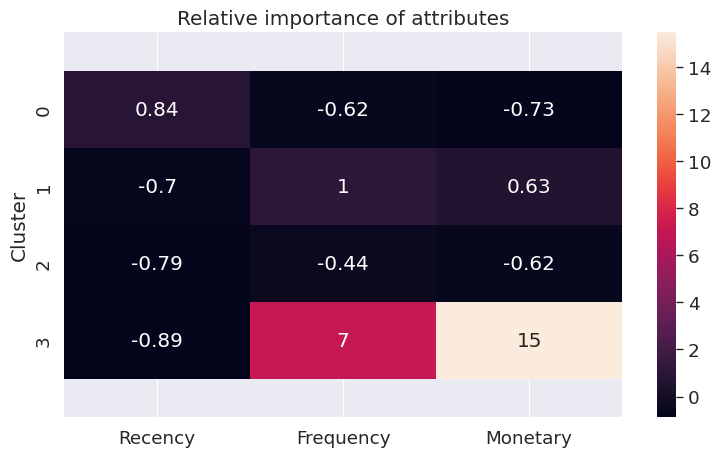

In [88]:
plt.figure(figsize=(9, 5))
plt.title('Relative importance of attributes')

ax = sns.heatmap(relative_imp, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.tight_layout()
#plt.gcf().subplots_adjust(bottom=0.15)
plt.show();

# TABLEAU

## Project Task: Week 4
## Data Reporting:

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

    b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

    c. Bar graph to show the count of orders vs. hours throughout the day

    d. Plot the distribution of RFM values using histogram and frequency charts

    e. Plot error (cost) vs. number of clusters selected

    f. Visualize to compare the RFM values of the clusters using heatmap

In [89]:
data.to_excel('TableauSource.xlsx')

# Conclusion:

It i critical requirement for business to understand the value derived from a customer. RFM and cohort analysis is a method used for analyzing customer value.
Business optimisation can be achieved with the above RFM customer segmentation with having segregated the customer base into groups of individuals based on well defined characteristics and traits. Visualization is added to implement the user story with relevant charts.
Necessary promotion campaigns with agressive price incentives and discounts can help monitor customer attrition.